# Week 08 Weekly Test

In [57]:
%pwd

'/home/jihoon_kim/Documents/Career/Fast_Campus_Data_Science_School/FC_DSS_5th/assignments'

In [58]:
!wget http://www.stat.tamu.edu/~sheather/book/docs/datasets/nyc.csv

--2017-07-03 10:03:14--  http://www.stat.tamu.edu/~sheather/book/docs/datasets/nyc.csv
Resolving www.stat.tamu.edu (www.stat.tamu.edu)... 165.91.112.167
Connecting to www.stat.tamu.edu (www.stat.tamu.edu)|165.91.112.167|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5029 (4.9K) [text/csv]
Saving to: ‘nyc.csv’

nyc.csv             100%[===================>]   4.91K  --.-KB/s    in 0s      

2017-07-03 10:03:15 (14.4 MB/s) - ‘nyc.csv’ saved [5029/5029]



In [118]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import statsmodels as sm
from patsy import dmatrix
from statsmodels.regression.linear_model import OLS
from statsmodels.tools.tools import add_constant

In [119]:
df = pd.read_csv("nyc.csv", encoding = "ISO-8859-1")

In [120]:
df.head(5)

,Case,Restaurant,Price,Food,Decor,Service,East
0,1,Daniella Ristorante,43,22,18,20,0
1,2,Tello's Ristorante,32,20,19,19,0
2,3,Biricchino,34,21,13,18,0
3,4,Bottino,41,20,20,17,0
4,5,Da Umberto,54,24,19,21,0


In [121]:
df.Case.value_counts().sum()

168

In [122]:
df.shape

(168, 7)

중복없이 모두 다른 레스토랑으로 구성되어있다.

# 문제 1

Food, Decor, Service는 1~30의 numerical data이나 East는 0과 1로 구성된 feature로 categorical data로 취급해야한다.

In [126]:
model = OLS.from_formula("Price ~ Food + Decor + Service + C(East) + 0", df)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     68.76
Date:                Mon, 03 Jul 2017   Prob (F-statistic):           5.35e-34
Time:                        10:34:05   Log-Likelihood:                -529.36
No. Observations:                 168   AIC:                             1069.
Df Residuals:                     163   BIC:                             1084.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
C(East)[0]   -24.0238      4.708     -5.102      0.0

성능은 $R^2 (or\ Adj. R^2)$로 나타낼 수 있다. $Adj. R^2 = 0.619$로 유의한 선형상관관계를 나타내고 있음을 알 수 있으며 정규성 검정수치결과도 정규성을 가지고 있음을 나타낸다.

## Scatter Plot

In [127]:
predictions = results.predict(df)

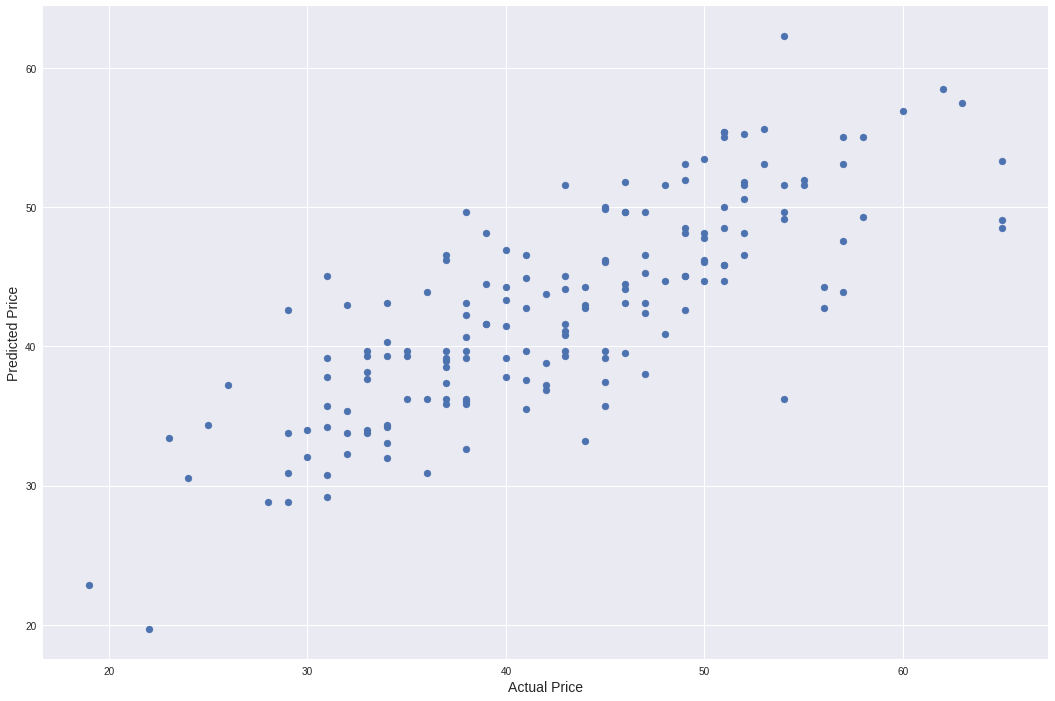

In [128]:
plt.figure(figsize=(18,12))
plt.scatter(df.Price,predictions)
plt.xlabel("Actual Price", fontsize=14)
plt.ylabel("Predicted Price", fontsize=14)
plt.show()

# 문제 2

문제 1에서의 summary에서 유의성은 독립변수 Service가 가장 떨어진다. 따라서 가장 유의성이 적은 Service를 제거하고 다시 모델링을 하면 다음과 같은 결과를 얻게 된다.

In [130]:
model = OLS.from_formula("Price ~ Food + Decor + C(East) + 0", df)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     92.24
Date:                Mon, 03 Jul 2017   Prob (F-statistic):           5.10e-35
Time:                        10:36:09   Log-Likelihood:                -529.36
No. Observations:                 168   AIC:                             1067.
Df Residuals:                     164   BIC:                             1079.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
C(East)[0]   -24.0269      4.673     -5.142      0.0

$Adj. R^2$의 값이 0.619에서 0.621로 향상된 것을 확인할 수 있다.

# 문제 3

Regression F-test를 각각의 변수에 대해 실시했을 때 Prob (F-statistic)을 비교하여 상대적 중요도 순위를 확인할 수 있다.

In [149]:
from statsmodels.stats.anova import anova_lm
anova_lm(result)

/home/jihoon_kim/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/jihoon_kim/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/jihoon_kim/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


,df,sum_sq,mean_sq,F,PR(>F)
Food,1.0,311444.133169,311444.133169,8206.884509,5.598158e-142
Decor,1.0,2809.856806,2809.856806,74.042719,5.933631e-15
Service,1.0,0.398102,0.398102,0.010490,9.185463e-01
East,1.0,204.954482,204.954482,5.400769,2.135465e-02
Residual,164.0,6223.657441,37.949131,NaN,NaN


따라서 중요도 순서는 다음과 같다.

1. Food
2. Decor
3. East
4. Service